# Imports

Use gpd_pyarrow_env for this notebook since it requires pyarrow to work

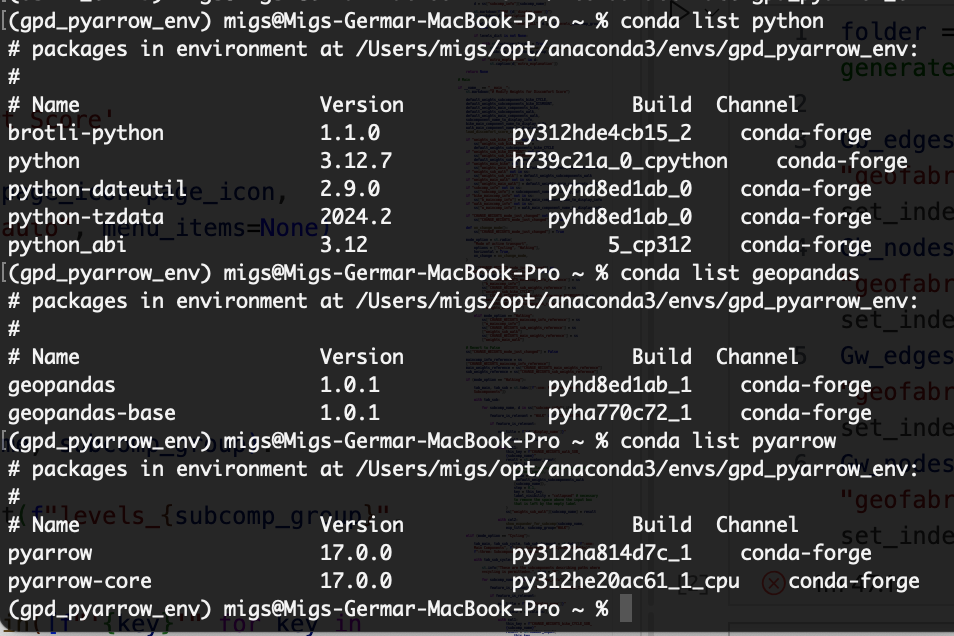

In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np

# Read data

In [6]:
folder = "01_outputs/" # note 01_outputs actually are generated after 02_outputs. So this is correct.

Gb_edges = gpd.read_file(folder + "geofabrik_bike_graph_edges_w_EDSAaccidents.geojson").set_index(["u", "v", "key"], drop = True)
Gb_nodes = gpd.read_file(folder + "geofabrik_bike_graph_nodes_w_brgycode_popdensity.geojson").set_index("osmid", drop = True)
Gw_edges = gpd.read_file(folder + "geofabrik_walk_graph_edges_w_EDSAaccidents.geojson").set_index(["u", "v", "key"], drop = True)
Gw_nodes = gpd.read_file(folder + "geofabrik_walk_graph_nodes_w_brgycode_popdensity.geojson").set_index("osmid", drop = True)

# Get features from image data

This section was copied from notebook 04.

In [7]:
folder = "from_image_data/features/"

bike_features = pd.read_csv(folder + "bike_features.csv").set_index(["u", "v", "key"], drop = True)
# bike_scaled_features = pd.read_csv(folder + "bike_scaled_features.csv").set_index(["u", "v", "key"], drop = True)
bike_cluster_full = pd.read_csv(folder + "bike_cluster_full.csv").set_index(["u", "v", "key"], drop = True)

walk_features = pd.read_csv(folder + "walk_features.csv").set_index(["u", "v", "key"], drop = True)
# walk_scaled_features = pd.read_csv(folder + "walk_scaled_features.csv").set_index(["u", "v", "key"], drop = True)
walk_cluster_full = pd.read_csv(folder + "walk_cluster_full.csv").set_index(["u", "v", "key"], drop = True)

bike_features = bike_features.rename({col: f"FROM_IMAGES_{col}" for col in bike_features.columns}, axis = 1)
walk_features = walk_features.rename({col: f"FROM_IMAGES_{col}" for col in walk_features.columns}, axis = 1)

In [8]:
Gb_edges = Gb_edges.merge(bike_features, how = "left", left_index=True, right_index=True)
Gw_edges = Gw_edges.merge(walk_features, how = "left", left_index=True, right_index=True)

In [9]:
Gb_edges.columns[-20:]

Index(['TAG_bus:lanes', 'TAG_survey:name', 'TAG_source:name:mapillary',
       'TAG_public_transport', 'TAG_indoor', 'TAG_width:lanes',
       'TAG_barrier:personnel', 'TAG_bridge:structure', 'EDSA_accidents',
       'geometry', 'FROM_IMAGES_has_crosswalk', 'FROM_IMAGES_has_traffic_sign',
       'FROM_IMAGES_has_traffic_light', 'FROM_IMAGES_has_bicycle',
       'FROM_IMAGES_obstruction_density', 'FROM_IMAGES_sidewalk_ratio',
       'FROM_IMAGES_cycling_lane_coverage', 'FROM_IMAGES_greenery_ratio',
       'FROM_IMAGES_road_condition', 'FROM_IMAGES_scene_label'],
      dtype='object')

In [10]:
Gb_edges.index.is_unique, Gw_edges.index.is_unique

(True, True)

# Export as feather

In [11]:
folder = "09_outputs/"

Gb_edges.to_feather(folder + "Gb_edges.feather")
Gb_nodes.to_feather(folder + "Gb_nodes.feather")
Gw_edges.to_feather(folder + "Gw_edges.feather")
Gw_nodes.to_feather(folder + "Gw_nodes.feather")